In [34]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as P
import scipy.ndimage as ndimage
import scipy.optimize as optim
import tifffile as tf
import pandas as pd
import glob
import os
import math
import importlib
%matplotlib inline

import amaizeing_utils as maize

In [2]:
src = '/home/ejam/documents/css893/imagening_amaizeing/model/'
summary = pd.read_csv(src + 'model_summary.csv')
summary

,file_name,scan,label,x_pos,y_pos,scan_perimeter,scan_area,model_perimeter,model_area,length,...,bot_x3,bot_beg,bot_end,base_x0,base_x1,base_x2,base_x3,base_x4,base_beg,base_end
0,IMAG0001_l0_x1337_y2690,IMAG0001,0,1337,2690,19799.0,5839195.0,18215.605784,5.845531e+06,8510.867726,...,2.401694e-09,-3883.003940,4463.996060,-3951.219627,0.043892,-0.001275,4.467516e-07,6.338917e-09,-528.067327,413.932673
1,IMAG0001_l1_x317_y2403,IMAG0001,1,317,2403,18226.0,5339568.0,16134.031754,5.335261e+06,7647.792688,...,-6.992315e-12,-3492.897619,3976.102381,-3628.693573,0.251224,-0.000771,-2.522386e-06,1.190600e-08,-352.317294,373.682706
2,IMAG0002_l0_x176_y2061,IMAG0002,0,176,2061,17105.0,5456284.0,15516.327083,5.447720e+06,7103.936929,...,3.848144e-09,-3280.704823,3714.295177,-3311.200535,-0.042138,-0.001458,5.408627e-07,7.262243e-09,-488.964864,443.035136
3,IMAG0002_l1_x1446_y2024,IMAG0002,1,1446,2024,17378.0,4907802.0,16079.264237,4.903422e+06,7610.955000,...,-4.636413e-10,-3606.984808,3920.015192,-3675.272059,-0.016556,-0.000931,2.271781e-07,1.550244e-08,-326.065658,322.934342
4,IMAG0003_l0_x250_y1803,IMAG0003,0,250,1803,16671.0,4316393.0,15429.989643,4.314382e+06,7255.565257,...,1.164573e-09,-3393.569012,3797.430988,-3437.035719,-0.114022,-0.000445,1.208186e-06,6.479331e-09,-342.978945,349.021055
5,IMAG0003_l1_x1341_y1850,IMAG0003,1,1341,1850,14978.0,4122482.0,13592.848155,4.061590e+06,6319.812703,...,5.594739e-09,-2912.951596,3242.048404,-3064.463896,0.065989,-0.000476,-1.211486e-06,6.893752e-09,-335.200828,385.799172
6,IMAG0004_l0_x106_y1300,IMAG0004,0,106,1300,21155.0,6619847.0,19087.873609,6.598992e+06,9060.483162,...,4.467371e-09,-4146.014606,4731.985394,-4240.546052,-0.171951,-0.002282,3.599622e-06,2.012603e-08,-441.203876,331.796124
7,IMAG0004_l1_x1420_y3841,IMAG0004,1,1420,3841,14514.0,4448288.0,13008.961639,4.447896e+06,6120.713254,...,-6.057827e-11,-2853.764641,3157.235359,-2886.103930,-0.077967,-0.002728,-1.463465e-06,3.748339e-08,-256.467755,330.532245
8,IMAG0005_l0_x1106_y14,IMAG0005,0,1106,14,23446.0,7568440.0,21080.692073,7.513108e+06,9994.371080,...,2.323755e-09,-4575.031093,5178.968907,-4715.177193,0.514261,-0.001574,-5.314234e-06,1.448711e-08,-375.669197,467.330803
9,IMAG0005_l1_x147_y3337,IMAG0005,1,147,3337,15377.0,3454991.0,13555.666659,3.526180e+06,6335.912841,...,-7.965802e-11,-2907.409508,3278.590492,-3046.263646,-0.062921,0.000166,-3.222321e-06,1.305934e-08,-263.098069,388.901931


In [65]:
deg11, deg31 = 60,30
i = 0
L = summary.iloc[i]['length']/100

phi11 = deg11/180*math.pi
phi31 = deg31/180*math.pi

pcoefs1, pmax1 = maize.parabola_fit(phi11, phi31, L)
ccoefs1, cmax1 = maize.catenary_fit(phi11, phi31, L)

parabola1 = P.Polynomial(pcoefs1)

In [72]:
deg12, deg32 = 80,45
i = 0
L = summary.iloc[i]['length']/100

phi12 = deg12/180*math.pi
phi32 = deg32/180*math.pi

pcoefs2, pmax2 = maize.parabola_fit(phi12, phi32, L)
ccoefs2, cmax2 = maize.catenary_fit(phi12, phi32, L)

parabola2 = P.Polynomial(pcoefs2)

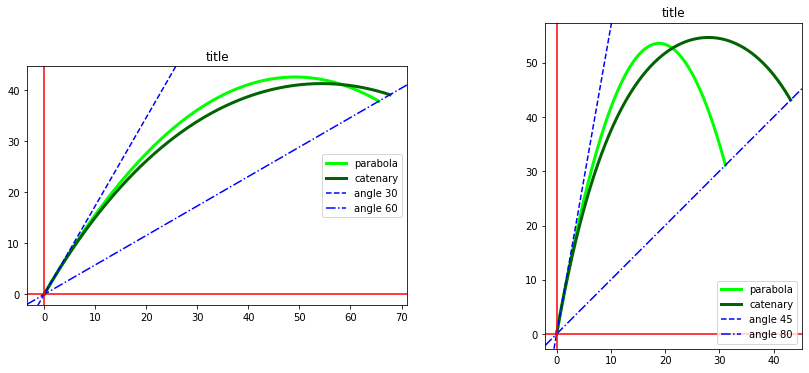

In [76]:
pxrange1 = np.linspace(0,pmax1,1000)
cxrange1 = np.linspace(0, cmax1, 1000)

pxrange2 = np.linspace(0,pmax2,1000)
cxrange2 = np.linspace(0, cmax2, 1000)

fig, axes = plt.subplots(1,2,figsize=(15,6))

axes[0].plot(pxrange1, parabola1(pxrange1), c='lime', lw=3, label='parabola')
axes[0].plot(cxrange1, maize.catenary(cxrange1, ccoefs1), c='darkgreen', lw=3, label='catenary')
axes[0].axline((0,0), slope=math.tan(phi11), c='b', ls='--', label='angle {}'.format(deg31))
axes[0].axline((0,0), slope=math.tan(phi31), c='b', ls='-.', label='angle {}'.format(deg11))

axes[0].axvline(x=0, c='r')
axes[0].axhline(y=0, c='r')
axes[0].legend()
axes[0].set_title('title')
axes[0].set_aspect('equal')

axes[1].plot(pxrange2, parabola2(pxrange2), c='lime', lw=3, label='parabola')
axes[1].plot(cxrange2, maize.catenary(cxrange2, ccoefs2), c='darkgreen', lw=3, label='catenary')
axes[1].axline((0,0), slope=math.tan(phi12), c='b', ls='--', label='angle {}'.format(deg32))
axes[1].axline((0,0), slope=math.tan(phi32), c='b', ls='-.', label='angle {}'.format(deg12))

axes[1].axvline(x=0, c='r')
axes[1].axhline(y=0, c='r')
axes[1].legend()
axes[1].set_title('title')
axes[1].set_aspect('equal')

plt.savefig(src + 'parabola_vs_catenary.png', dpi=200, format='png', bbox_inches='tight')